In [54]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


# 0. Overview

## Predictors

There are 10 features

- longitude
- latitude
- housing_median_age
- total_rooms
- total_bedrooms
- population
- households
- median_income
- median_house_value
- ocean_proximity



## Task

- Predict a district's median housing price given the other data about the district


# 1. Download the Data

In [12]:
import os 
import tarfile
import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"
HOUSING_PATH = os.path.join("data", "housing")

def fetch_housing_data(data_url=HOUSING_URL, data_path=HOUSING_PATH):
    # create directory if not exits
    if not os.path.isdir(data_path):
        os.makedirs(data_path)

    # fetch data
    tgz_path = os.path.join(data_path, 'housing.tgz')
    urllib.request.urlretrieve(data_url, tgz_path)
    data_tgz = tarfile.open(tgz_path)
    data_tgz.extractall(path=data_path)
    data_tgz.close()

fetch_housing_data()

# 2. Read the Data

In [223]:
def load_housing_data():    
    csv_path = os.path.join(HOUSING_PATH, 'housing.csv')
    return pd.read_csv(csv_path)


In [224]:
housing = load_housing_data()
housing.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [225]:
housing.shape


(20640, 10)

In [226]:
housing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


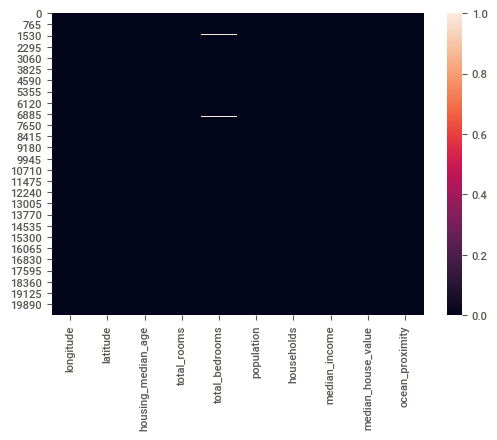

In [227]:
sns.heatmap(housing.isnull())
plt.show()


In [228]:
housing['ocean_proximity'].value_counts()


<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

There are 20640 observations and 10 features. 

Notice that the 'total_bedrooms' attribute has 207 null values.

All attributes are numerical except the 'ocean_proximity' field.


# 3. Sweetviz

In [229]:
import sweetviz as sv

advert_report = sv.analyze(housing)


In [230]:
# display the report
advert_report.show_html('Advertising.html')


Report Advertising.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# 4. Create a Test Set

# 5. Visualization Data

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

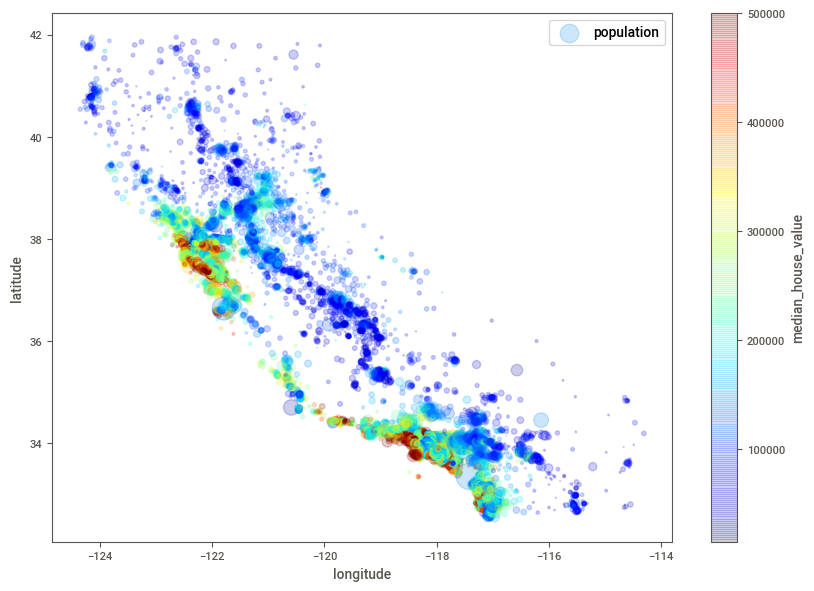

In [231]:

housing.plot(kind='scatter', x='longitude', y='latitude', alpha=.2,
        s=housing["population"]/100, label="population", figsize=(10,7),
        c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True,
        sharex=False
)


The housing prices is related to the location and population.


# 6. Correlation

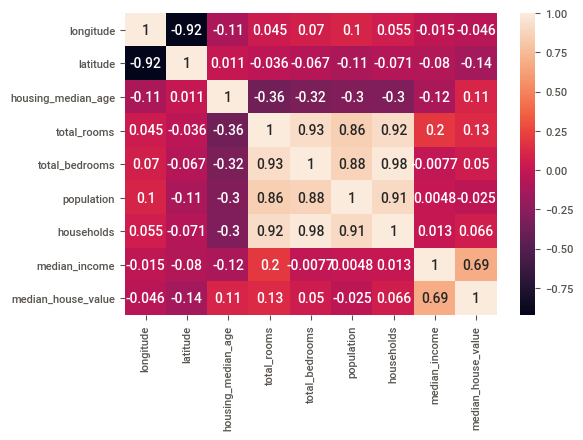

In [232]:

correlation_matrix = housing.corr()

sns.heatmap(correlation_matrix, annot=True)

plt.show()



There is a strong positive correlation between house prices and income
- which means the median house prices tends to go up when the income increases.

There is a slight negative correlation between house prices and latitude
- the prices will go down when you go north


Text(0, 0.5, 'Median House Value')

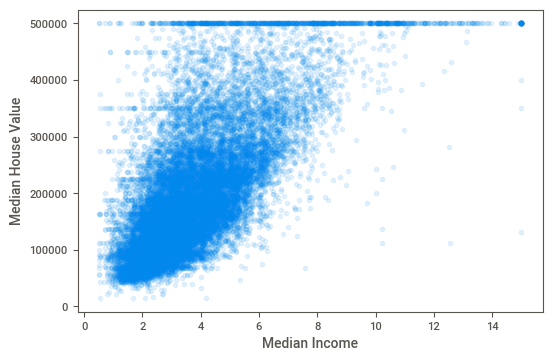

In [233]:
fig, ax = plt.subplots()

ax.scatter(housing['median_income'], housing['median_house_value'], alpha=0.1)
ax.set_xlabel('Median Income')
ax.set_ylabel('Median House Value')


# 7. Combination or Group

# 8. Prepare the Data for ML

In [302]:
# split the predictors and targets from the data set

X_train = housing.drop('median_house_value', axis=1)

y_train = housing['median_house_value']

X_train.shape, y_train.shape


((20640, 9), (20640,))

In [303]:
X_train.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY


In [304]:
y_train.head()


0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

## Missing Values

In [ ]:
"""
Several options:
- remove the observation
- fill the value with some values( mean, median, mode, 0, min, max...)
- remove the corresponding attribute
"""

In [305]:

null_rows = X_train[X_train['total_bedrooms'].isnull()]

null_rows.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,NEAR BAY


In [306]:
# option 1
null_rows.dropna()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [307]:
# option 2
null_rows.drop('total_bedrooms', axis=1)


,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
290,-122.16,37.77,47.0,1256.0,570.0,218.0,4.3750,NEAR BAY
341,-122.17,37.75,38.0,992.0,732.0,259.0,1.6196,NEAR BAY
538,-122.28,37.78,29.0,5154.0,3741.0,1273.0,2.5762,NEAR BAY
563,-122.24,37.75,45.0,891.0,384.0,146.0,4.9489,NEAR BAY
696,-122.10,37.69,41.0,746.0,387.0,161.0,3.9063,NEAR BAY
...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,3171.0,779.0,3.3409,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,1938.0,762.0,1.6953,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,1701.0,669.0,5.1033,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,2734.0,814.0,6.6073,<1H OCEAN


In [105]:
# option 3

mean_bedrooms = X_train['total_bedrooms'].mean()

print('mean bedrooms: ', mean_bedrooms)

X_train['total_bedrooms'] = X_train['total_bedrooms'].fillna(mean_bedrooms)

# test
X_train.iloc[290]


mean bedrooms:  537.8705525375639


longitude              -122.16
latitude                 37.77
housing_median_age          47
total_rooms               1256
total_bedrooms         537.871
population                 570
households                 218
median_income            4.375
ocean_proximity       NEAR BAY
Name: 290, dtype: object

In [308]:
# option 3: using sklearn

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")


In [309]:
housing_without_ocean_cate = X_train.drop('ocean_proximity', axis=1)

housing_without_ocean_cate.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462


In [310]:

filled_housing = imputer.fit_transform(housing_without_ocean_cate)

filled_housing_df = pd.DataFrame(filled_housing, columns=housing_without_ocean_cate.columns,
                          index=housing.index)

filled_housing_df.loc[null_rows.index.values]


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
290,-122.16,37.77,47.0,1256.0,435.0,570.0,218.0,4.3750
341,-122.17,37.75,38.0,992.0,435.0,732.0,259.0,1.6196
538,-122.28,37.78,29.0,5154.0,435.0,3741.0,1273.0,2.5762
563,-122.24,37.75,45.0,891.0,435.0,384.0,146.0,4.9489
696,-122.10,37.69,41.0,746.0,435.0,387.0,161.0,3.9063
...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,435.0,3171.0,779.0,3.3409
20268,-119.18,34.19,19.0,2393.0,435.0,1938.0,762.0,1.6953
20372,-118.88,34.17,15.0,4260.0,435.0,1701.0,669.0,5.1033
20460,-118.75,34.29,17.0,5512.0,435.0,2734.0,814.0,6.6073


## Categorical Variables

In [311]:
housing_cat = X_train[['ocean_proximity']]

housing_cat.tail()


,ocean_proximity
20635,INLAND
20636,INLAND
20637,INLAND
20638,INLAND
20639,INLAND


### Option 1: To numbers

In [253]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

housing_cat_encoded[:-10]


array([[3.],
       [3.],
       [3.],
       ...,
       [1.],
       [1.],
       [1.]])

In [254]:
ordinal_encoder.categories_


[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### Option 2: 1-of-K

In [312]:
pd.get_dummies(X_train, prefix='A', columns=['ocean_proximity'])


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,A_<1H OCEAN,A_INLAND,A_ISLAND,A_NEAR BAY,A_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,0,1,0,0,0


In [256]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder(sparse=False)
housing_one_hot_encoder = one_hot_encoder.fit_transform(housing_cat)
housing_one_hot_encoder


array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [257]:
one_hot_encoder.categories_


[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## Custom Transformers

In [299]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        rooms_per_household =  X[:, rooms_ix] / X[:, households_ix]
        
        population_per_household = X[:, population_ix] / X[:, households_ix]
        
        return np.c_[X, rooms_per_household, population_per_household]


In [300]:

attr_adder = CombinedAttributesAdder()
                   
housing_extra_attribs = pd.DataFrame(
    attr_adder.transform(X_train.values),

    columns=list(X_train.columns) + ["rooms_per_household",'population_per_household'],    
    
    index=X_train.index
)

housing_extra_attribs.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
0,-122.23,37.88,41,880,129,322,126,8.3252,NEAR BAY,6.98413,2.55556
1,-122.22,37.86,21,7099,1106,2401,1138,8.3014,NEAR BAY,6.23814,2.10984
2,-122.24,37.85,52,1467,190,496,177,7.2574,NEAR BAY,8.28814,2.80226
3,-122.25,37.85,52,1274,235,558,219,5.6431,NEAR BAY,5.81735,2.54795
4,-122.25,37.85,52,1627,280,565,259,3.8462,NEAR BAY,6.28185,2.18147


## Feature Scaling

In [ ]:
"""
- min-max normalization

- standardization

"""

In [314]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

mul_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median')),
    ('attr_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
    
])

                   
housing_extra_attribs = pd.DataFrame(
    mul_pipeline.fit_transform(housing_without_ocean_cate),

    columns=list(housing_without_ocean_cate.columns)+["rooms_per_household",'population_per_household'],    
    
    index=X_train.index
)

housing_extra_attribs.head()



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household
0,-1.327835,1.052548,0.982143,-0.804819,-0.972476,-0.974429,-0.977033,2.344766,0.628559,-0.049597
1,-1.322844,1.043185,-0.607019,2.045890,1.357143,0.861439,1.669961,2.332238,0.327041,-0.092512
2,-1.332827,1.038503,1.856182,-0.535746,-0.827024,-0.820777,-0.843637,1.782699,1.155620,-0.025843
3,-1.337818,1.038503,1.856182,-0.624215,-0.719723,-0.766028,-0.733781,0.932968,0.156966,-0.050329
4,-1.337818,1.038503,1.856182,-0.462404,-0.612423,-0.759847,-0.629157,-0.012881,0.344711,-0.085616


In [316]:
# comparison with the original data

X_train.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY


## Column Transformer

In [371]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_without_ocean_cate)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", mul_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(X_train)


In [372]:
housing_prepared.shape


(20640, 15)

In [373]:

                   
housing_prepared = pd.DataFrame(
    housing_prepared,

    columns=list(housing_without_ocean_cate.columns) + 
        ["rooms_per_household",'population_per_household', '1HOCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],    
    
    index=X_train.index
)

housing_prepared.iloc[[1, 4490, 1220, 9020, 9900]]


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,1HOCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
1,-1.322844,1.043185,-0.607019,2.045890,1.357143,0.861439,1.669961,2.332238,0.327041,-0.092512,0.0,0.0,0.0,1.0,0.0
4490,0.683662,-0.735924,1.379433,-1.061057,-1.039241,-0.904667,-1.081657,-0.930516,-0.685677,0.153299,1.0,0.0,0.0,0.0,0.0
1220,-0.594113,1.164913,-1.719432,2.086687,1.791116,1.544922,1.609802,-0.011512,0.411314,-0.021483,0.0,1.0,0.0,0.0,0.0
9020,0.384183,-0.693788,-1.560516,-0.684263,-0.853253,-0.687436,-0.835790,1.566884,0.372255,0.050433,0.0,0.0,0.0,0.0,1.0
9900,-1.347800,1.244505,-0.686477,0.565758,0.615576,0.585043,0.717880,-0.299283,-0.173395,-0.035913,0.0,0.0,0.0,1.0,0.0


## Feature Selection

# 9.Learning a Model

# 10. Tune the Model